<a href="https://colab.research.google.com/github/belalabouzaid/siads699_team13_collab/blob/main/SDAP_Validation_Maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up Environment

In [ ]:
!pip install rasterio
!pip install rioxarray

In [ ]:
import pandas as pd
import numpy as np
from scipy.interpolate import griddata
import rasterio
from rasterio.transform import Affine
import matplotlib.pyplot as plt
import rioxarray

## Setting up mapping functions

In [ ]:
# SINGLE MAP
def smi_map(df, val_name, location, year):
  #df columns must be 'x', 'y', 'act_smi' or 'pred_smi' or 'residual'
  #val_name should be: "Actual SMI", "Predicted SMI", or "Residuals"
  if val_name == "Residuals":
    da = (df.set_index(["y", "x"]).residual.to_xarray())
    da.rio.set_crs(4326, inplace=True)
    da.plot.imshow(origin='lower', cmap='seismic', vmin=-1, vmax=1)
  elif val_name == "Actual SMI":
    da = (df.set_index(["y", "x"]).act_smi.to_xarray())
    da.rio.set_crs(4326, inplace=True)
    da.plot.imshow(origin='lower', cmap='twilight_r', vmin=0, vmax=1)
  elif val_name == "Predicted SMI":
    da = (df.set_index(["y", "x"]).pred_smi.to_xarray())
    da.rio.set_crs(4326, inplace=True)
    da.plot.imshow(origin='lower', cmap='twilight_r', vmin=0, vmax=1)
  else:
    print("val_name should be: 'Actual SMI', 'Predicted SMI', or 'Residuals'")
  plt.title(val_name+" - "+year+"\n" +location)
  plt.xlabel('longitude')
  plt.ylabel('latitude')
  plt.ticklabel_format(style='plain')

In [ ]:
# ACTUAL, PREDICTED, AND RESIDUAL MAP ALL-IN-ONE
def smi_maps(df, location, year):
  #df columns must be 'x', 'y', 'act_smi', 'pred_smi', and 'residual'
  plt.figure(figsize=(20,5))
  #plot1
  df1 = df[['x', 'y', 'pred_smi']]
  da = df1.set_index(["y", "x"]).pred_smi.to_xarray()
  da.rio.set_crs(4326, inplace=True)
  plt.subplot(1,3,1) #1 row, 3 columns, 1st
  da.plot.imshow(origin='lower', cmap='twilight_r', vmin=0, vmax=1)
  plt.title("Predicted SMI", fontsize=14)
  plt.xlabel('longitude')
  plt.ylabel('latitude')
  plt.ticklabel_format(style='plain')

  #plot2
  df2 = df[['x', 'y', 'act_smi']]
  da = df2.set_index(["y", "x"]).act_smi.to_xarray()
  da.rio.set_crs(4326, inplace=True)
  plt.subplot(1,3,2) #1 row, 3 columns, 2nd
  da.plot.imshow(origin='lower', cmap='twilight_r', vmin=0, vmax=1)
  plt.title("Actual SMI", fontsize=14)
  plt.xlabel('longitude')
  plt.ylabel('latitude')
  plt.ticklabel_format(style='plain')

  #plot3
  df3 = df[['x', 'y', 'residual']]
  da = df3.set_index(["y", "x"]).residual.to_xarray()
  da.rio.set_crs(4326, inplace=True)
  plt.subplot(1,3,3) #1 row, 3 columns, 3rd
  da.plot.imshow(origin='lower', cmap='seismic', vmin=-1, vmax=1)
  plt.title("Residuals", fontsize=14)
  plt.xlabel('longitude')
  plt.ylabel('latitude')
  plt.ticklabel_format(style='plain')


  plt.suptitle(location +' - '+ year, fontsize=18)
  plt.tight_layout()

# SMI Maps for Model Trained on Three Rivers, CA - 2022

## Three Rivers, CA 2021 - Validation Dataset

In [ ]:
mapdf_3R_21 = pd.read_csv('/content/data/mapdf_3R_21.csv')
mapdf_3R_21

,x,y,act_smi,pred_smi,residual
0,329760.0,4037640.0,0.127610,0.149672,-0.022062
1,329790.0,4037640.0,0.137367,0.152557,-0.015190
2,329820.0,4037640.0,0.134610,0.157690,-0.023080
3,329850.0,4037640.0,0.136235,0.151824,-0.015589
4,329880.0,4037640.0,0.134937,0.157632,-0.022695
...,...,...,...,...,...
41795,336210.0,4037670.0,0.186387,0.198690,-0.012303
41796,336240.0,4037670.0,0.177518,0.196491,-0.018973
41797,336270.0,4037670.0,0.186831,0.199149,-0.012318
41798,336300.0,4037670.0,0.188232,0.199926,-0.011694


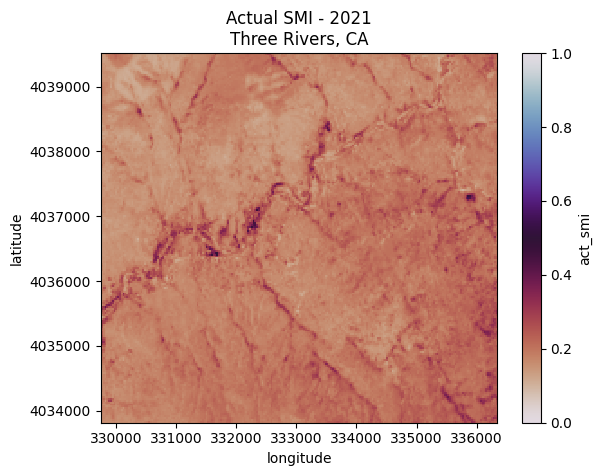

In [ ]:
smi_map(mapdf_3R_21, val_name='Actual SMI', location="Three Rivers, CA", year="2021")

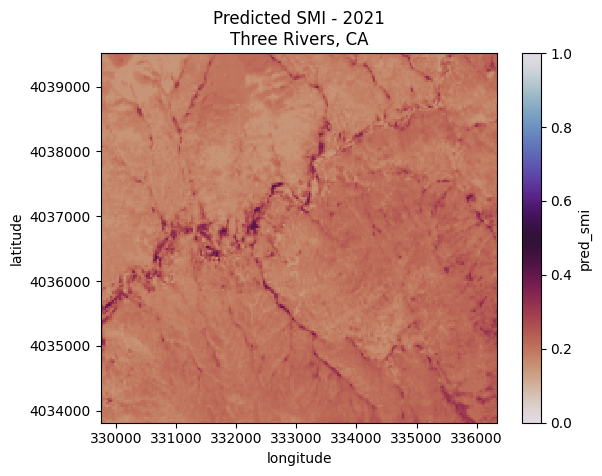

In [ ]:
smi_map(mapdf_3R_21, val_name='Predicted SMI', location="Three Rivers, CA", year="2021")

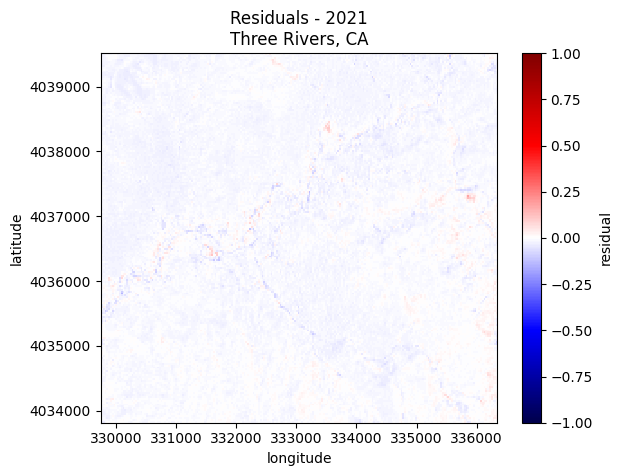

In [ ]:
smi_map(mapdf_3R_21, val_name='Residuals', location="Three Rivers, CA", year="2021")

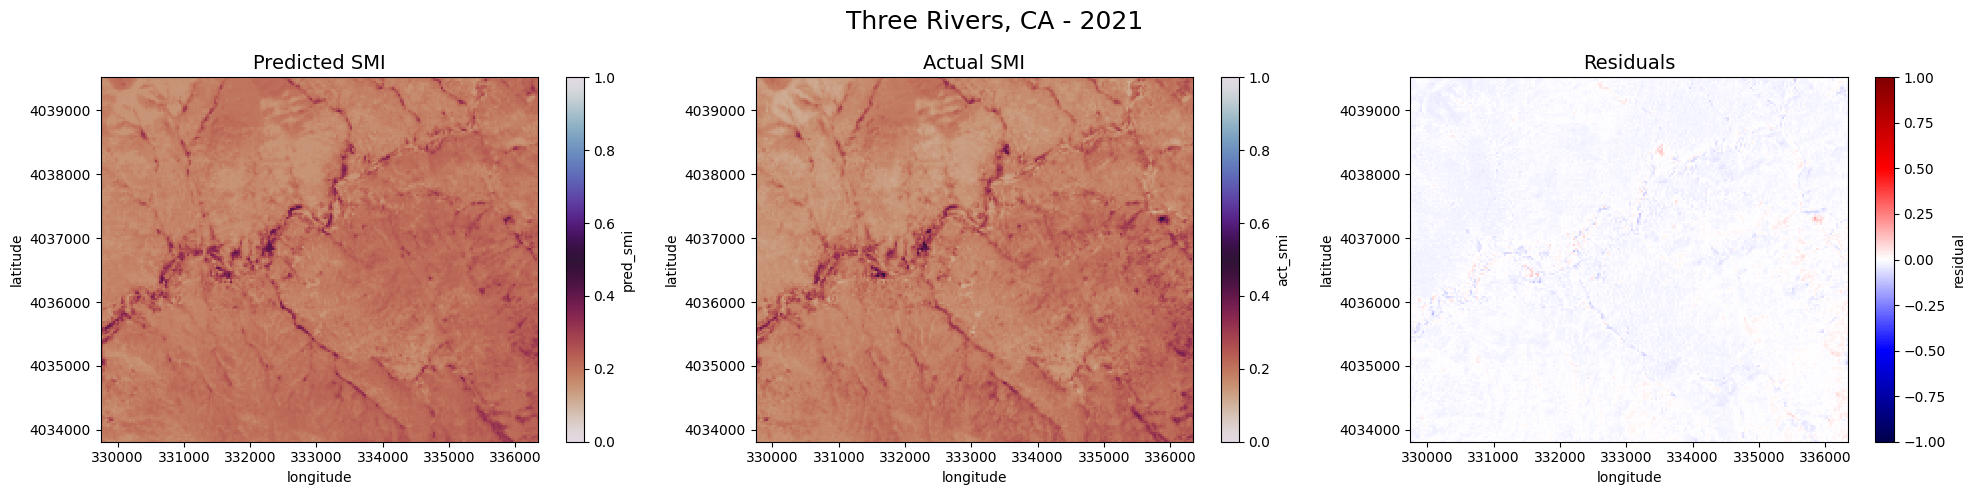

In [ ]:
smi_maps(mapdf_3R_21, location="Three Rivers, CA", year="2021")

## Mariposa, CA 2021 - Validation Dataset

In [ ]:
mapdf_M_21 = pd.read_csv('/content/data/mapdf_M_21.csv')
mapdf_M_21

,x,y,act_smi,pred_smi,residual
0,762840.0,4157430.0,0.393253,0.280886,0.112368
1,762870.0,4157430.0,0.365617,0.285315,0.080301
2,762900.0,4157430.0,0.381808,0.277491,0.104316
3,762930.0,4157430.0,0.268151,0.268003,0.000148
4,762960.0,4157430.0,0.286896,0.247044,0.039851
...,...,...,...,...,...
64536,771000.0,4157460.0,0.322283,0.268442,0.053842
64537,771030.0,4157460.0,0.345251,0.266641,0.078609
64538,771060.0,4157460.0,0.274997,0.269287,0.005710
64539,771090.0,4157460.0,0.284064,0.268277,0.015786


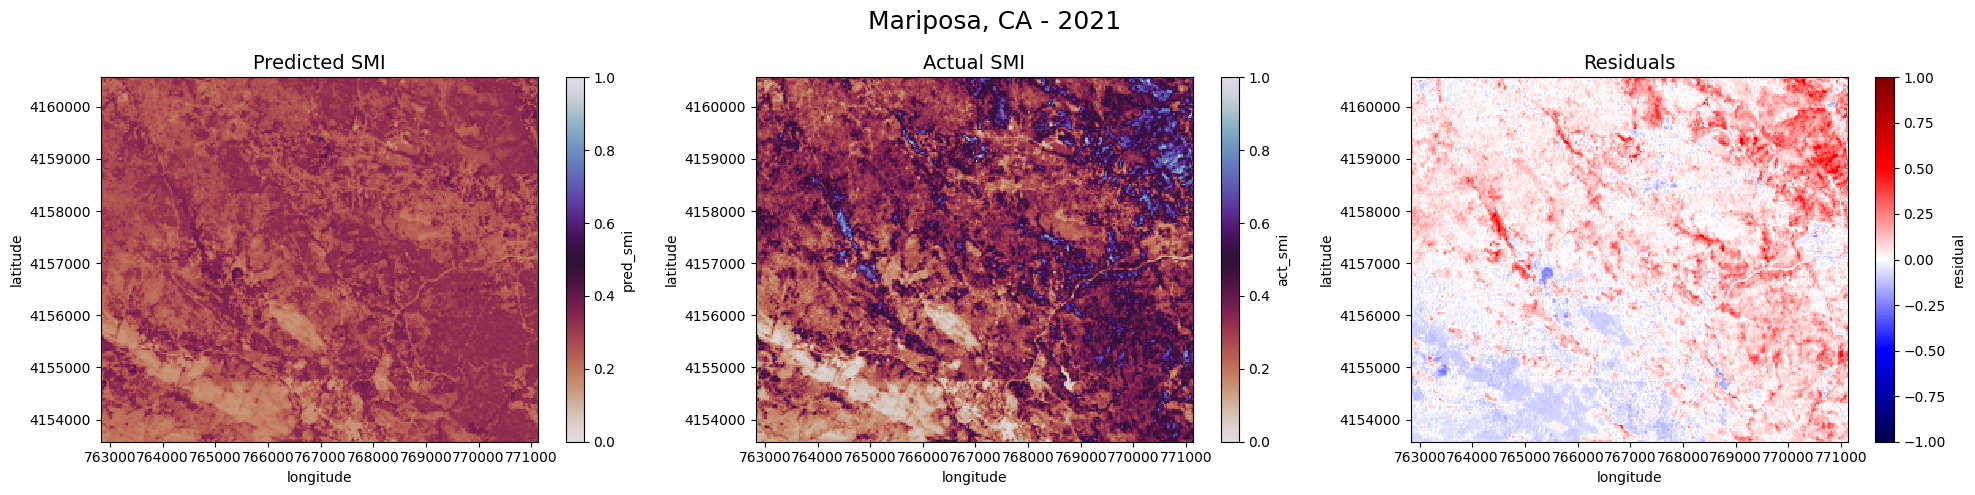

In [ ]:
smi_maps(mapdf_M_21, location="Mariposa, CA", year="2021")

# SMI Maps for Model Trained on Mariposa, CA - 2021

## Mariposa, CA 2022 - Validation Dataset

In [ ]:
mapdf_M_22 = pd.read_csv('/content/data/mapdf_M_22.csv')
mapdf_M_22

,x,y,act_smi,pred_smi,residual
0,762840.0,4157430.0,0.390868,0.367605,0.023263
1,762870.0,4157430.0,0.359428,0.365295,-0.005867
2,762900.0,4157430.0,0.347029,0.339990,0.007038
3,762930.0,4157430.0,0.226352,0.296543,-0.070190
4,762960.0,4157430.0,0.241123,0.251012,-0.009889
...,...,...,...,...,...
64536,771000.0,4157460.0,0.287819,0.312318,-0.024499
64537,771030.0,4157460.0,0.287429,0.308809,-0.021380
64538,771060.0,4157460.0,0.270511,0.298473,-0.027962
64539,771090.0,4157460.0,0.241115,0.319373,-0.078258


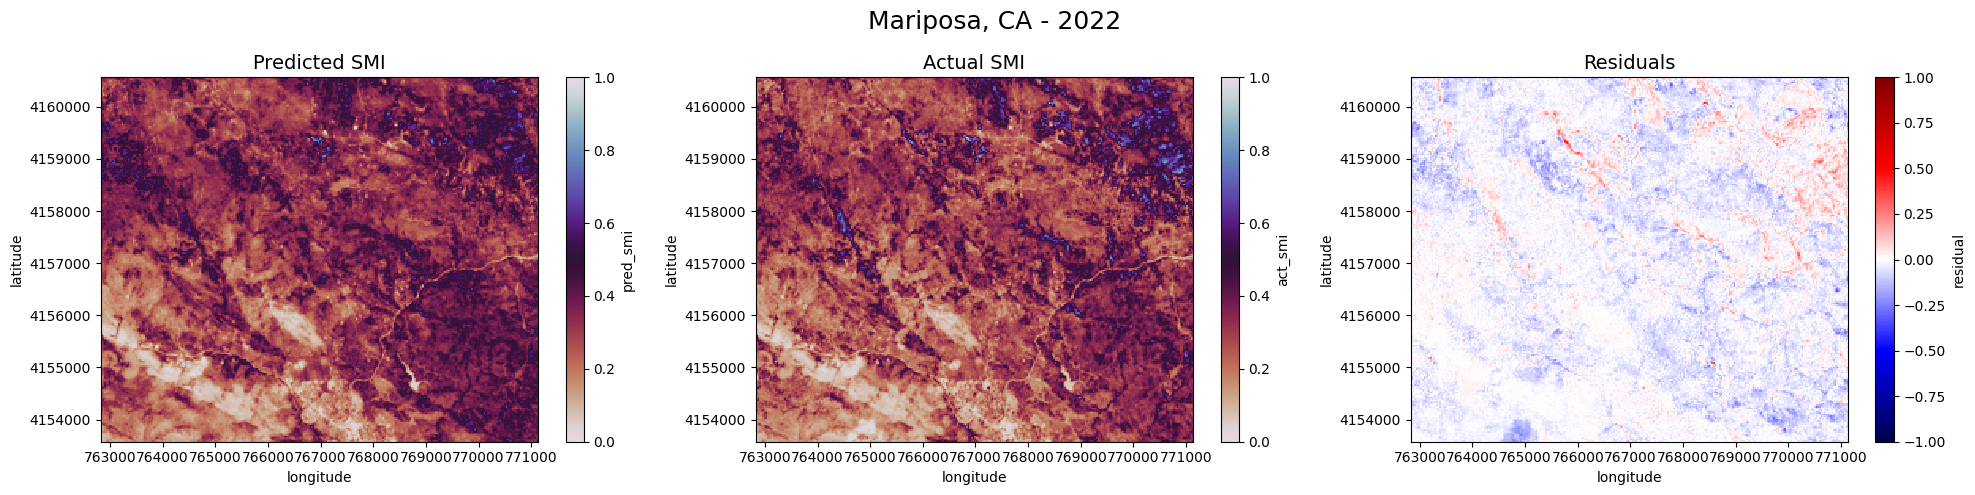

In [ ]:
smi_maps(mapdf_M_22, location="Mariposa, CA", year="2022")

## Three Rivers, CA 2022 - Validation Dataset

In [ ]:
mapdf_3R_22 = pd.read_csv('/content/data/mapdf_3R_22.csv')
mapdf_3R_22

,x,y,act_smi,pred_smi,residual
0,329760.0,4037640.0,0.148800,0.076970,0.071830
1,329790.0,4037640.0,0.174008,0.118421,0.055587
2,329820.0,4037640.0,0.167364,0.117148,0.050216
3,329850.0,4037640.0,0.170148,0.108536,0.061612
4,329880.0,4037640.0,0.177978,0.118326,0.059652
...,...,...,...,...,...
41795,336210.0,4037670.0,0.218498,0.195785,0.022713
41796,336240.0,4037670.0,0.210547,0.191991,0.018556
41797,336270.0,4037670.0,0.208499,0.205424,0.003075
41798,336300.0,4037670.0,0.204904,0.202550,0.002353


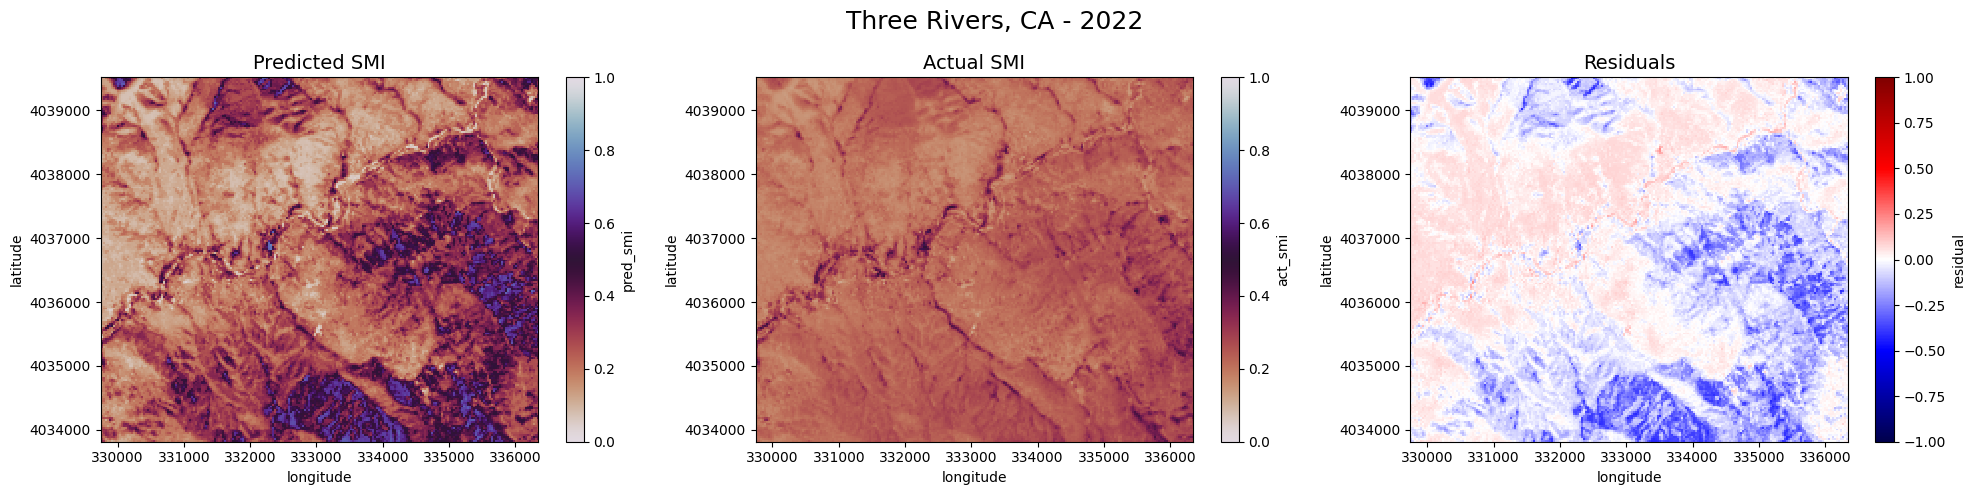

In [ ]:
smi_maps(mapdf_3R_22, location="Three Rivers, CA", year="2022")

# SMI Maps for Model Trained on Barstow, CA - 2017

## Barstow, CA 2022 - Larger Validation Region

In [ ]:
mapdf_B_lg_22 = pd.read_csv('/content/data/mapdf_B_lg_22.csv')
mapdf_B_lg_22

FileNotFoundError: ignored

In [ ]:
smi_maps(mapdf_B_lg_22, location="Barstow, CA - Large Validation Region", year="2022")

NameError: ignored

## Barstow, CA 2022 - Validation Dataset

In [ ]:
mapdf_B_22 = pd.read_csv('/content/data/mapdf_B_22.csv')
mapdf_B_22

In [ ]:
smi_maps(mapdf_B_22, location="Barstow, CA", year="2022")